# Introduction

In this notebook, we'll perform basic aggregation, imputation, model building, and profit margin attribution for the retail sales data located in "retail_sales_data.csv". 

Fortunately, this dataset has been given to us clean and we'll only be performing some feature engineering rather than raw data cleaning. 

There will be 3 parts to our analysis:
1. Aggregation and plotting. 
2. Rental cost data imputation.
3. Profit margin attribution. 

Let's jump into it!

In [403]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [356]:
# Utility functions
identity = lambda x: x[0]

In [357]:
data = pd.read_csv("summer_internship_takehome.csv")

# Section 1

### Profit Margin Calculation

"The profit margin formula is net income divided by net sales. Net sales is gross sales minus discounts, returns, and allowances. Net income is total revenue minus expenses. A 10% margin is considered average."

Source: https://www.fundera.com/blog/profit-margins#:~:text=The%20profit%20margin%20formula%20is,10%25%20margin%20is%20considered%20average.

In our dataset:

$Net\ income = Gross\ revenue - Fixed\ cost - Variable\ cost - Rental\ cost$

$Net\ sales = Gross\ revenue$

In [358]:
data["Net income"] = data["Gross revenue"] - (data["Fixed cost"] + data["Variable cost"] + data["Rental cost"])
# Rounded profit margin so it's easier to read
data["Profit Margin %"] = ((data["Net income"]/data["Gross revenue"]) * 100).round(2)

In [359]:
data
# so # prods doesn't change at a location

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Net income,Profit Margin %
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,14765945.10,30.37
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,12036707.48,25.02
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,20089024.69,31.22
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,12775913.49,27.81
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,7941319.37,24.24
...,...,...,...,...,...,...,...,...,...,...,...
3991,333,8,TX,56295415.57,10711406.46,29142010.15,286920,4478,False,16155078.96,28.70
3992,333,9,TX,63512936.32,12675148.57,32346778.80,286920,4478,False,18204088.95,28.66
3993,333,10,TX,54062593.50,9784913.45,28299846.81,286920,4478,False,15690913.24,29.02
3994,333,11,TX,48903414.85,10638082.89,25285040.20,286920,4478,False,12693371.76,25.96


In [360]:
annual_data = data.groupby("Location number").agg({
    "State": identity, 
    "Gross revenue": np.sum,
    "Fixed cost": np.sum,
    "Variable cost": np.sum,
    "Rental cost": np.sum,
    "Number of products": identity,
    "Owned": identity,
    "Net income": np.sum
})
# Redoing else would need to take weighted avg of profit margin %'s
annual_data["Net income"] = annual_data["Gross revenue"] - (annual_data["Fixed cost"] + annual_data["Variable cost"] + annual_data["Rental cost"])
# Rounded profit margin so it's easier to read
annual_data["Profit Margin %"] = ((annual_data["Net income"]/annual_data["Gross revenue"]) * 100).round(3)


In [361]:
pm_mean = annual_data["Profit Margin %"].mean().round(3)
pm_median = annual_data["Profit Margin %"].median().round(3)

print("The mean annual profit margin of a typical store is " + str(pm_mean) + "%")
print("The median annual profit margin of a typical store is " + str(pm_median) + "%")

The mean annual profit margin of a typical store is 24.863%
The median annual profit margin of a typical store is 26.185%


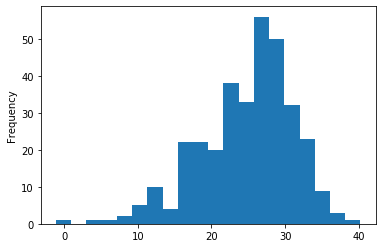

In [362]:
# SHOULD ADD LABELING AND TITLE
annual_data["Profit Margin %"].plot.hist(bins=20)

In [363]:
data.columns

Index(['Location number', 'Month', 'State', 'Gross revenue', 'Fixed cost',
       'Variable cost', 'Rental cost', 'Number of products', 'Owned',
       'Net income', 'Profit Margin %'],
      dtype='object')

In [364]:
monthly_data = data.groupby("Month").agg({
    "Gross revenue": np.sum,
    "Fixed cost": np.sum,
    "Variable cost": np.sum,
    "Rental cost": np.sum,
    "Number of products": identity,
    "Net income": np.sum
})
# Redoing else would need to take weighted avg of profit margin %'s
monthly_data["Net income"] = monthly_data["Gross revenue"] - (monthly_data["Fixed cost"] + monthly_data["Variable cost"] + monthly_data["Rental cost"])
# Rounded profit margin so it's easier to read
monthly_data["Profit Margin %"] = ((monthly_data["Net income"]/monthly_data["Gross revenue"]) * 100).round(3)

In [365]:
monthly_data.head()

,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Net income,Profit Margin %
Month,,,,,,,
1,9.304129e+09,2.069499e+09,4.943004e+09,49191170,4452,2.242435e+09,24.102
2,9.786843e+09,1.964354e+09,5.180280e+09,49191170,4452,2.593018e+09,26.495
3,1.158736e+10,2.296857e+09,6.126065e+09,49191170,4452,3.115249e+09,26.885
4,9.105208e+09,1.915483e+09,4.754642e+09,49191170,4452,2.385892e+09,26.204
5,9.347461e+09,1.877253e+09,4.860179e+09,49191170,4452,2.560839e+09,27.396


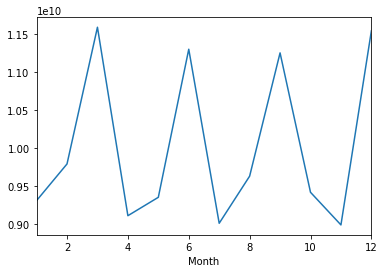

In [366]:
monthly_data["Gross revenue"].plot.line()

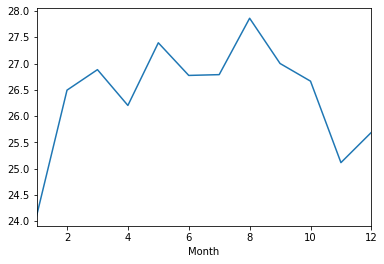

In [367]:
monthly_data["Profit Margin %"].plot.line()

In [368]:
# copy monthly data, add qtr column, say assuming qtrs follow calendar yr
qtrly_data = monthly_data.copy()
qtrly_data["Quarter"] = ((qtrly_data.index-0.33)//3).astype(int)
qtrly_data = qtrly_data.groupby("Quarter").agg({
    "Gross revenue": np.sum,
    "Fixed cost": np.sum,
    "Variable cost": np.sum,
    "Rental cost": np.sum,
    "Net income": np.sum
})
# Redoing else would need to take weighted avg of profit margin %'s
qtrly_data["Net income"] = qtrly_data["Gross revenue"] - (qtrly_data["Fixed cost"] + qtrly_data["Variable cost"] + qtrly_data["Rental cost"])
# Rounded profit margin so it's easier to read
qtrly_data["Profit Margin %"] = ((qtrly_data["Net income"]/qtrly_data["Gross revenue"]) * 100).round(3)

In [369]:
qtrly_data

,Gross revenue,Fixed cost,Variable cost,Rental cost,Net income,Profit Margin %
Quarter,,,,,,
0,3.067833e+10,6.330709e+09,1.624935e+10,147573510,7.950702e+09,25.916
1,2.975031e+10,6.168927e+09,1.546212e+10,147573510,7.971688e+09,26.795
2,2.988107e+10,6.241126e+09,1.536014e+10,147573510,8.132233e+09,27.215
3,2.993717e+10,6.227698e+09,1.583052e+10,147573510,7.731375e+09,25.825


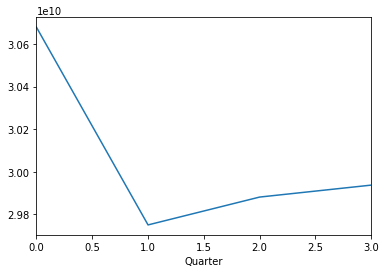

In [370]:
qtrly_data["Gross revenue"].plot.line()

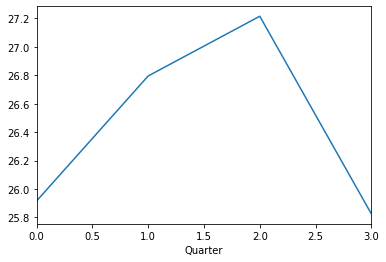

In [371]:
qtrly_data["Profit Margin %"].plot.line()

to impute a rental cost for owned locations, i want to find the avg of all rental costs initially wanted to do in that state
but so will do for whole country
was gonna use number of products for input but doesn't vary much but used bc above
could make a OLS linear regression for this but tthat's overkill lol


might do pca to understand, looked at coefs

# Section 2

In [372]:
# writing a model. first get data for prediction
# only using non linearly dep cols so have right rank
locations_with_rental_cost = annual_data.copy()[annual_data["Rental cost"] != 0]
locations_without_rental_cost = annual_data.copy()[annual_data["Rental cost"] == 0]
# Could add ranodm state
X_train, X_test, y_train, y_test = train_test_split(
    locations_with_rental_cost[["Gross revenue", "Fixed cost", "Variable cost", "Number of products"]], 
    locations_with_rental_cost[["Rental cost"]], test_size=0.33, random_state=42)
#normalization doesn't make a difference
model = LinearRegression()
model.fit(X_train, y_train)
print("R^2 for training data: " + str(model.score(X_train, y_train)))
print("R^2 for testing data: " + str(model.score(X_test, y_test)))

R^2 for training data: 0.5382194602429282
R^2 for testing data: 0.6595239337717438


In [373]:
model.coef_

array([[ 1.39979521e-02,  1.47795639e-02, -1.99144070e-02,
        -4.39975439e+03]])

In [374]:
# decent r2 not the best but should do ok job, preds seem reasonable
predicted_rents = model.predict(locations_without_rental_cost[["Gross revenue", "Fixed cost", "Variable cost", "Number of products"]])
predicted_rents[:5]

array([[1042902.72320158],
       [4310567.97925624],
       [1300965.76236878],
       [1420227.23018952],
       [1163392.42609584]])

In [375]:
locations_without_rental_cost["Rental cost"] = predicted_rents
rent_adjusted_annual_data = locations_without_rental_cost.append(locations_with_rental_cost).sort_index()
# Redoing else would need to take weighted avg of profit margin %'s
rent_adjusted_annual_data["Net income"] = rent_adjusted_annual_data["Gross revenue"] - (rent_adjusted_annual_data["Fixed cost"] + rent_adjusted_annual_data["Variable cost"] + rent_adjusted_annual_data["Rental cost"])
# Rounded profit margin so it's easier to read
rent_adjusted_annual_data["Profit Margin %"] = ((rent_adjusted_annual_data["Net income"]/rent_adjusted_annual_data["Gross revenue"]) * 100).round(3)
rent_adjusted_annual_data["Location number"] = rent_adjusted_annual_data.index
rent_adjusted_annual_data

,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Net income,Profit Margin %,Location number
Location number,,,,,,,,,,
1,TX,5.447389e+08,1.108956e+08,2.793687e+08,4.390560e+06,4452,False,1.500840e+08,27.552,1
2,TX,3.559730e+08,7.287395e+07,1.937291e+08,7.832400e+05,4502,False,8.858672e+07,24.886,2
3,IL,3.317718e+08,6.429775e+07,1.848279e+08,1.042903e+06,4620,True,8.160328e+07,24.596,3
4,GA,2.639843e+08,6.410409e+07,1.432398e+08,1.696920e+06,4481,False,5.494349e+07,20.813,4
5,NJ,1.890016e+08,4.475050e+07,1.037553e+08,8.940000e+05,4533,False,3.960178e+07,20.953,5
...,...,...,...,...,...,...,...,...,...,...
329,TX,2.618542e+08,6.329245e+07,1.387819e+08,8.636400e+05,4426,False,5.891617e+07,22.500,329
330,GA,3.149292e+08,6.667465e+07,1.589002e+08,2.699160e+06,4581,False,8.665523e+07,27.516,330
331,CO,3.344844e+08,7.125264e+07,1.743095e+08,7.352400e+05,4641,False,8.818705e+07,26.365,331


In [376]:
ra_pm_mean = rent_adjusted_annual_data["Profit Margin %"].mean().round(3)
ra_pm_median = rent_adjusted_annual_data["Profit Margin %"].median().round(3)

print("The rent-adjusted mean annual profit margin of a typical store is " + str(ra_pm_mean) + "%")
print("The rent-adjusted median annual profit margin of a typical store is " + str(ra_pm_median) + "%")

The rent-adjusted mean annual profit margin of a typical store is 24.82%
The rent-adjusted median annual profit margin of a typical store is 26.116%


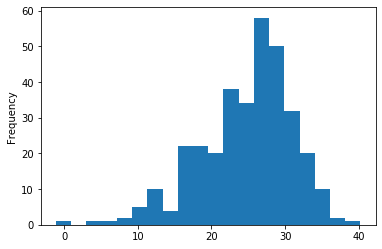

In [377]:
# SHOULD ADD LABELING AND TITLE
rent_adjusted_annual_data["Profit Margin %"].plot.hist(bins=20)

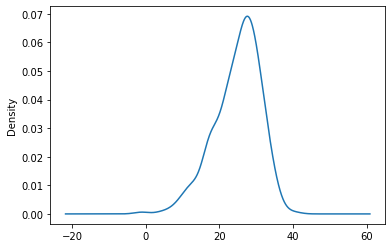

In [378]:
annual_data["Profit Margin %"].plot.kde()

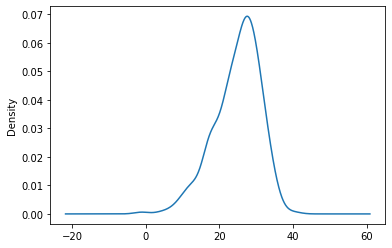

In [379]:
rent_adjusted_annual_data["Profit Margin %"].plot.kde()

# Section 3

main focus is on maximizing profit margin by location

started by adding cost of living data

used rent_adjusted bc that accounts for amortized payments for owned location even fi we do decide ot buy
focus is on value of a dollar cuz that indicates buying power, could also have looked at wage. could even have incorporated this to model above, but dangerous cuz do'nt know if that data's even real or if so wher it's from
source: https://www.patriotsoftware.com/blog/accounting/average-cost-living-by-state/

In [380]:
state_abbreviation_data = pd.read_csv("state_abbreviations.csv")
state_abbreviation_data.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [381]:
col_data = pd.read_csv("cost_of_living_data.csv")
col_data = col_data.merge(state_abbreviation_data, how="inner", on="State")
col_data.head()

,State,Annual Mean Wage (All Occupations),Median Monthly Rent,Value of a Dollar,Abbrev,Code
0,Alabama,"$43,790",$998,$1.15,Ala.,AL
1,Alaska,"$58,710","$1,748",$0.95,Alaska,AK
2,Arizona,"$49,290","$1,356",$1.04,Ariz.,AZ
3,Arkansas,"$41,540",$953,$1.15,Ark.,AR
4,California,"$59,150","$2,518",$0.87,Calif.,CA


In [382]:
rent_adjusted_annual_data = rent_adjusted_annual_data.merge(col_data, how="left", left_on="State", right_on="Code")

In [383]:
rent_adjusted_annual_data.shape

(333, 16)

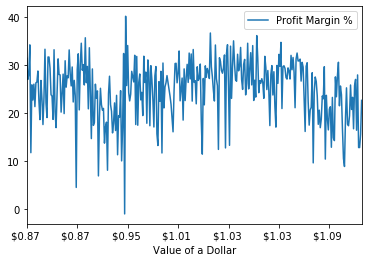

In [385]:
rent_adjusted_annual_data.sort_values("Value of a Dollar").plot.line("Value of a Dollar", "Profit Margin %")

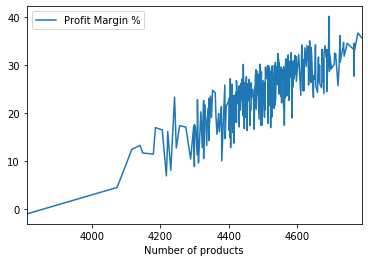

In [386]:
rent_adjusted_annual_data.sort_values("Number of products").plot.line("Number of products", "Profit Margin %")

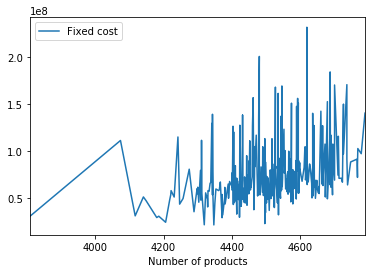

In [388]:
rent_adjusted_annual_data.sort_values("Number of products").plot.line("Number of products", "Fixed cost")

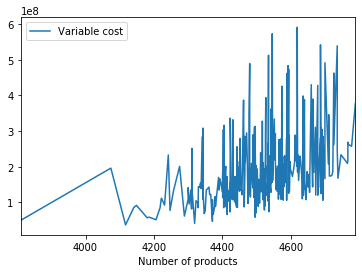

In [389]:
rent_adjusted_annual_data.sort_values("Number of products").plot.line("Number of products", "Variable cost")

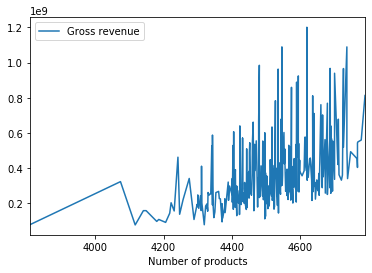

In [390]:
rent_adjusted_annual_data.sort_values("Number of products").plot.line("Number of products", "Gross revenue")

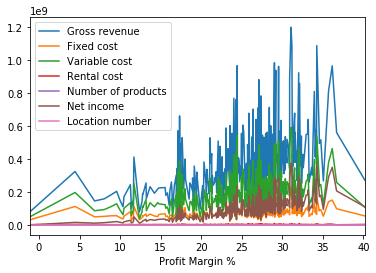

In [394]:
rent_adjusted_annual_data.sort_values("Profit Margin %").plot.line("Profit Margin %")
# naturally many of these are linearly dep, but fun to see anyway

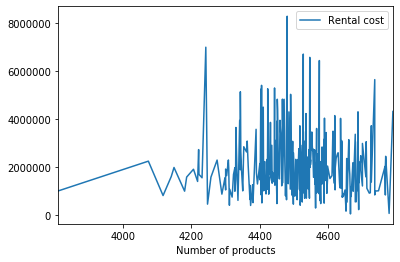

In [395]:
rent_adjusted_annual_data.sort_values("Number of products").plot.line("Number of products", "Rental cost")

In [400]:
# idk why this comparison if we're imputing
not_owned = rent_adjusted_annual_data[rent_adjusted_annual_data["Owned"] != True]
owned = rent_adjusted_annual_data[rent_adjusted_annual_data["Owned"] == True]
print(owned["Profit Margin %"].mean())
print(not_owned["Profit Margin %"].median())
print(owned["Profit Margin %"].mean())
print(not_owned["Profit Margin %"].median())

28.215416666666666
25.679
28.215416666666666
25.679


(36, 16)

In [402]:
# not imputing
not_owned = annual_data[annual_data["Owned"] != True]
owned = annual_data[annual_data["Owned"] == True]
print(owned["Profit Margin %"].mean())
print(not_owned["Profit Margin %"].median())
print(owned["Profit Margin %"].mean())
print(not_owned["Profit Margin %"].median())
#aha, this was done intentioanlly!

28.618277777777777
25.679
28.618277777777777
25.679
